In [2]:
import time
import os


import numpy as np
import pandas as pd

import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV,train_test_split



from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib

from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

### The Data 

In [3]:
path = 'max_data/SixAirlinesDataV2.csv'
data = pd.read_csv(path, sep = ',', na_filter = False)
#data = data.set_index('id')
data=data.drop(columns='Unnamed: 0')
data.head()

,Airline,Aircraft,FlightDuration,IsInternational,SeatsEconomy,SeatsPremium,PitchEconomy,PitchPremium,WidthEconomy,WidthPremium,PriceEconomy,PricePremium,PriceRelative,SeatsTotal,PitchDifference,WidthDifference,PercentPremiumSeats,month_num
0,0.089142,-0.693889,-0.817844,3.294215,-0.436182,-0.343385,1.220342,-2.215259,0.302148,-1.357472,-0.578401,-0.802415,0.06,-0.442612,-2.091811,-1.381970,0.009871,-1.639972
1,0.089142,-0.693889,-0.783876,3.294215,-1.029628,-1.147585,1.220342,-2.968588,-1.455802,-2.258698,-0.667926,-0.870953,0.07,-1.098823,-2.650559,-1.381970,-0.411592,-1.639972
2,0.648468,-0.693889,-1.199981,-0.303562,-0.554871,-1.878677,-1.818641,1.551387,-1.455802,1.346207,-1.010589,-1.018270,0.65,-0.794154,1.819422,1.912112,-2.053194,0.282340
3,0.089142,1.441153,-1.542489,3.294215,-1.108754,-1.147585,1.220342,-2.968588,-1.455802,-2.258698,-1.141274,-1.256183,0.09,-1.169131,-2.650559,-1.381970,-0.297797,0.282340
4,1.207793,-0.693889,-0.161134,-0.303562,-0.053740,-0.416494,1.220342,0.044729,-1.455802,-0.456246,1.630900,1.014233,0.07,-0.114507,-0.415569,0.265071,-0.457953,-0.678816


The dataset that we have now is in what we call a pandas dataframe. To convert it to an array, simply access its values:

In [4]:
print ("Dimension of training data {}".format(data.shape))

Dimension of training data (320, 18)


In [5]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              320 non-null    float64
 1   Aircraft             320 non-null    float64
 2   FlightDuration       320 non-null    float64
 3   IsInternational      320 non-null    float64
 4   SeatsEconomy         320 non-null    float64
 5   SeatsPremium         320 non-null    float64
 6   PitchEconomy         320 non-null    float64
 7   PitchPremium         320 non-null    float64
 8   WidthEconomy         320 non-null    float64
 9   WidthPremium         320 non-null    float64
 10  PriceEconomy         320 non-null    float64
 11  PricePremium         320 non-null    float64
 12  PriceRelative        320 non-null    float64
 13  SeatsTotal           320 non-null    float64
 14  PitchDifference      320 non-null    float64
 15  WidthDifference      320 non-null    flo

In [6]:
data.describe()

,Airline,Aircraft,FlightDuration,IsInternational,SeatsEconomy,SeatsPremium,PitchEconomy,PitchPremium,WidthEconomy,WidthPremium,PriceEconomy,PricePremium,PriceRelative,SeatsTotal,PitchDifference,WidthDifference,PercentPremiumSeats,month_num
count,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,320.000000,320.000000,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02
mean,-1.165734e-16,1.443290e-16,-7.771561e-17,-3.066991e-16,1.582068e-16,8.881784e-17,2.217670e-15,2.084444e-15,2.775558e-18,-1.326717e-15,3.885781e-17,0.000000,0.495094,4.718448e-17,-1.595946e-16,-1.082467e-16,-2.775558e-16,-7.271961e-16
std,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566,0.453322,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00
min,-1.029508e+00,-6.938887e-01,-1.740634e+00,-3.035625e-01,-1.662636e+00,-1.878677e+00,-1.818641e+00,-2.968588e+00,-1.455802e+00,-2.258698e+00,-1.245205e+00,-1.331024,0.020000,-1.637853e+00,-2.650559e+00,-1.381970e+00,-2.053194e+00,-1.639972e+00
25%,-1.029508e+00,-6.938887e-01,-9.169164e-01,-3.035625e-01,-8.779693e-01,-9.282579e-01,-2.991499e-01,4.472892e-02,-1.455802e+00,-4.562457e-01,-9.009986e-01,-0.991288,0.107500,-8.410259e-01,-4.155686e-01,-5.584499e-01,-4.579533e-01,-6.788164e-01
50%,-4.701827e-01,-6.938887e-01,5.116389e-02,-3.035625e-01,-1.658350e-01,1.683795e-01,-2.991499e-01,4.472892e-02,3.021476e-01,-4.562457e-01,-7.058099e-02,-0.111522,0.380000,-1.203663e-01,1.431791e-01,-5.584499e-01,-2.619726e-01,2.823396e-01
75%,6.484676e-01,1.441153e+00,8.522362e-01,-3.035625e-01,5.133302e-01,4.608162e-01,1.220342e+00,4.472892e-02,3.021476e-01,1.346207e+00,5.560910e-01,0.950422,0.740000,4.831129e-01,1.431791e-01,1.088591e+00,1.911009e-01,1.243496e+00
max,1.767118e+00,1.441153e+00,2.055260e+00,3.294215e+00,2.438730e+00,2.361654e+00,2.739833e+00,1.551387e+00,2.060098e+00,1.346207e+00,2.385171e+00,4.441915,1.890000,2.381436e+00,1.819422e+00,1.912112e+00,2.157229e+00,1.243496e+00


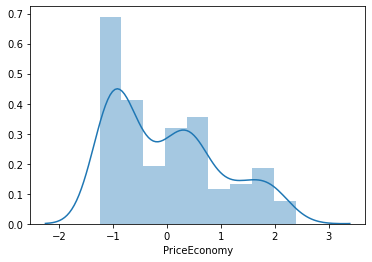

In [7]:
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(data['PriceEconomy'])

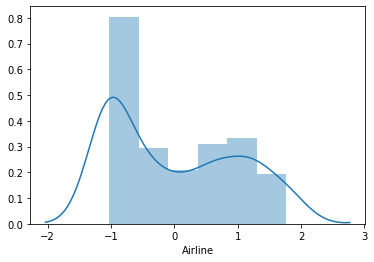

In [8]:
sns.distplot(data['Airline'])

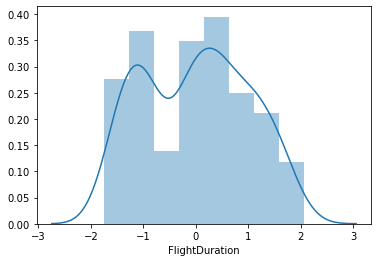

In [9]:
sns.distplot(data['FlightDuration'])

In [10]:
# variables seleccionadas según diferentes criterios  根据不同标准选择变量
Y = data[['PriceEconomy']].copy()
Y = Y.values
X = data.drop(columns = ['PriceEconomy']).copy()
X = X.values

In [11]:
X, Y

(array([[ 0.08914245, -0.69388867, -0.81784385, ..., -1.38197044,
          0.00987147, -1.63997243],
        [ 0.08914245, -0.69388867, -0.78387612, ..., -1.38197044,
         -0.41159228, -1.63997243],
        [ 0.64846763, -0.69388867, -1.1999808 , ...,  1.91211181,
         -2.05319359,  0.28233958],
        ...,
        [-1.02950791,  1.44115338, -1.174505  , ..., -0.55844988,
          0.19110088,  0.28233958],
        [-1.02950791, -0.69388867,  0.24081705, ..., -0.55844988,
          2.15722928,  1.24349558],
        [-0.47018273, -0.69388867,  1.46648594, ...,  1.08859124,
          0.11945205, -0.67881643]]),
 array([[-0.57840139],
        [-0.66792596],
        [-1.01058897],
        [-1.14127426],
        [ 1.63090034],
        [-0.79243715],
        [-1.13510015],
        [ 0.49692246],
        [-1.15362248],
        [ 0.55351845],
        [-0.49505093],
        [-1.0064729 ],
        [-0.98074745],
        [-0.93855771],
        [-0.94781887],
        [-0.79243715],
     

Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [12]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [13]:
X_scale

array([[0.4       , 0.        , 0.24310216, ..., 0.        , 0.48998999,
        0.        ],
       [0.4       , 0.        , 0.25205071, ..., 0.        , 0.38988989,
        0.        ],
       [0.6       , 0.        , 0.14243102, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.        , 1.        , 0.14914243, ..., 0.25      , 0.53303303,
        0.66666667],
       [0.        , 0.        , 0.52199851, ..., 0.25      , 1.        ,
        1.        ],
       [0.2       , 0.        , 0.84489187, ..., 0.75      , 0.51601602,
        0.33333333]])

In [14]:
# shuffle and split data into train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(X_scale, Y, 
                                                    test_size=0.2, random_state=42) 

print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)

training data shape:  (256, 17)
testing data shape:  (64, 17)


In [15]:
X_train

array([[0.2       , 0.        , 0.64578673, ..., 0.75      , 0.51351351,
        1.        ],
       [0.        , 1.        , 0.14914243, ..., 0.25      , 0.53303303,
        0.66666667],
       [0.6       , 0.        , 0.14914243, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.8       , 1.        , 0.59134974, ..., 0.25      , 0.38988989,
        0.33333333],
       [0.        , 0.        , 0.72706935, ..., 0.25      , 0.40990991,
        1.        ],
       [0.8       , 1.        , 0.52796421, ..., 0.25      , 0.38988989,
        1.        ]])

### Building and Training Our First Neural Network 

In [16]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

In [17]:

#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               2700      
_________________________________________________________________
dense_1 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_3 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_4 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 151       
Tota

In [18]:
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])

Train on 204 samples, validate on 52 samples
Epoch 1/300
204/204 [==============================] - 0s 763us/sample - loss: 0.8925 - mean_absolute_error: 0.7899 - val_loss: 0.7089 - val_mean_absolute_error: 0.6904
Epoch 2/300
204/204 [==============================] - 0s 63us/sample - loss: 0.6254 - mean_absolute_error: 0.6279 - val_loss: 0.4767 - val_mean_absolute_error: 0.5236
Epoch 3/300
204/204 [==============================] - 0s 73us/sample - loss: 0.4267 - mean_absolute_error: 0.4983 - val_loss: 0.3641 - val_mean_absolute_error: 0.4807
Epoch 4/300
204/204 [==============================] - 0s 68us/sample - loss: 0.2978 - mean_absolute_error: 0.4322 - val_loss: 0.2723 - val_mean_absolute_error: 0.3648
Epoch 5/300
204/204 [==============================] - 0s 73us/sample - loss: 0.1972 - mean_absolute_error: 0.3207 - val_loss: 0.0920 - val_mean_absolute_error: 0.2318
Epoch 6/300
204/204 [==============================] - 0s 74us/sample - loss: 0.1249 - mean_absolute_error: 0.2777

204/204 [==============================] - 0s 59us/sample - loss: 0.0019 - mean_absolute_error: 0.0328 - val_loss: 0.0087 - val_mean_absolute_error: 0.0742
Epoch 50/300
204/204 [==============================] - 0s 63us/sample - loss: 0.0026 - mean_absolute_error: 0.0412 - val_loss: 0.0050 - val_mean_absolute_error: 0.0553
Epoch 51/300
204/204 [==============================] - 0s 73us/sample - loss: 0.0020 - mean_absolute_error: 0.0341 - val_loss: 0.0061 - val_mean_absolute_error: 0.0623
Epoch 52/300
204/204 [==============================] - 0s 73us/sample - loss: 0.0017 - mean_absolute_error: 0.0312 - val_loss: 0.0051 - val_mean_absolute_error: 0.0571
Epoch 53/300
204/204 [==============================] - 0s 78us/sample - loss: 0.0023 - mean_absolute_error: 0.0386 - val_loss: 0.0056 - val_mean_absolute_error: 0.0596
Epoch 54/300
204/204 [==============================] - 0s 69us/sample - loss: 0.0023 - mean_absolute_error: 0.0372 - val_loss: 0.0071 - val_mean_absolute_error: 0.0655

Epoch 97/300
204/204 [==============================] - 0s 54us/sample - loss: 0.0019 - mean_absolute_error: 0.0334 - val_loss: 0.0058 - val_mean_absolute_error: 0.0588
Epoch 98/300
204/204 [==============================] - 0s 59us/sample - loss: 0.0022 - mean_absolute_error: 0.0370 - val_loss: 0.0050 - val_mean_absolute_error: 0.0530
Epoch 99/300
204/204 [==============================] - 0s 59us/sample - loss: 0.0013 - mean_absolute_error: 0.0288 - val_loss: 0.0040 - val_mean_absolute_error: 0.0454
Epoch 100/300
204/204 [==============================] - 0s 63us/sample - loss: 8.9081e-04 - mean_absolute_error: 0.0221 - val_loss: 0.0047 - val_mean_absolute_error: 0.0504
Epoch 101/300
204/204 [==============================] - 0s 63us/sample - loss: 8.8687e-04 - mean_absolute_error: 0.0226 - val_loss: 0.0042 - val_mean_absolute_error: 0.0489
Epoch 102/300
204/204 [==============================] - 0s 59us/sample - loss: 9.8025e-04 - mean_absolute_error: 0.0239 - val_loss: 0.0053 - val

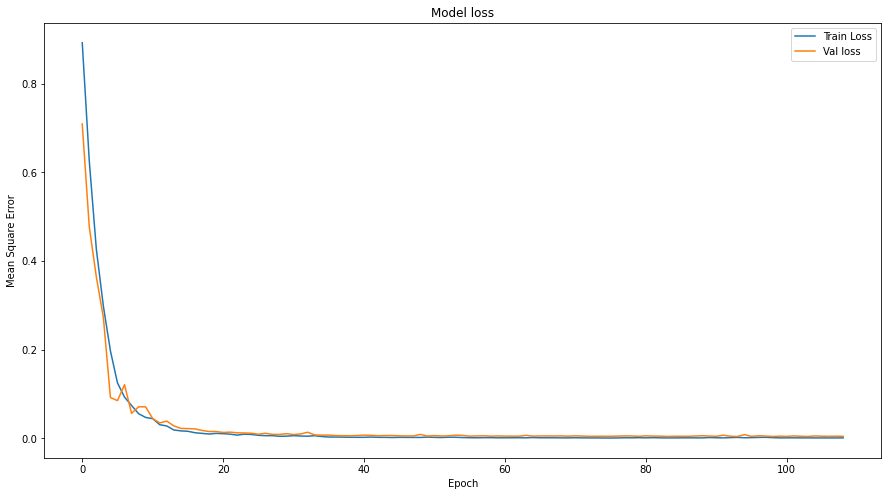

In [19]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [20]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])


64/64 [==============================] - 0s 31us/sample - loss: 0.0096 - mean_absolute_error: 0.0725
loss value:  0.009639328811317682
Mean absolute error:  0.07254108


In [21]:
'''=== predict the house price ==='''

# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)

mse = mean_squared_error(y_test,test_predictions)
r2 = r2_score(y_test, test_predictions, multioutput='uniform_average')
print("mse:", mse)
print("r2:", r2)

[ 1.8875977   0.47059494  1.5251606  -0.602578    0.6365905   1.4715757
  1.8441823  -1.0265751   0.49117818  0.5840279  -1.0271034   0.75704426
 -0.9237583  -1.1116471  -0.967624    1.4121661   1.7725078   1.1560808
  0.41794693  0.2818895  -1.1243405  -0.82807857 -1.2051977  -0.98765624
 -0.997277    1.0514712  -1.1205364   0.9878141   0.53463244 -0.8983588
  0.2988021  -0.8252127   1.3380347   1.9163649  -0.11043742 -1.0856625
  2.2091475   1.0593376  -0.716047    2.2110329   0.6051102  -0.4465476
  1.9671429  -0.80578625 -0.7092853  -1.0417691  -1.2019923  -0.7540741
  1.3758647   0.32824263 -1.090577    0.31207392 -1.0446405  -1.1787089
 -1.1582714   0.6373639   0.56116045 -0.7084234  -1.2431153  -0.6479992
  1.0672067   1.544162   -0.2094614  -0.13317142]
mse: 0.009639328224715133
r2: 0.992196894948511


In [22]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,[1.9962017456503172],1.887598
1,[0.5514604154564543],0.470595
2,[1.5825364929879715],1.525161
3,[-0.7564215152247422],-0.602578
4,[0.5535184515393514],0.636590
5,[1.7533534878684431],1.471576
6,[1.8017173358165282],1.844182
7,[-1.0229371879599352],-1.026575
8,[0.4742840623478076],0.491178
9,[0.6625943639329053],0.584028


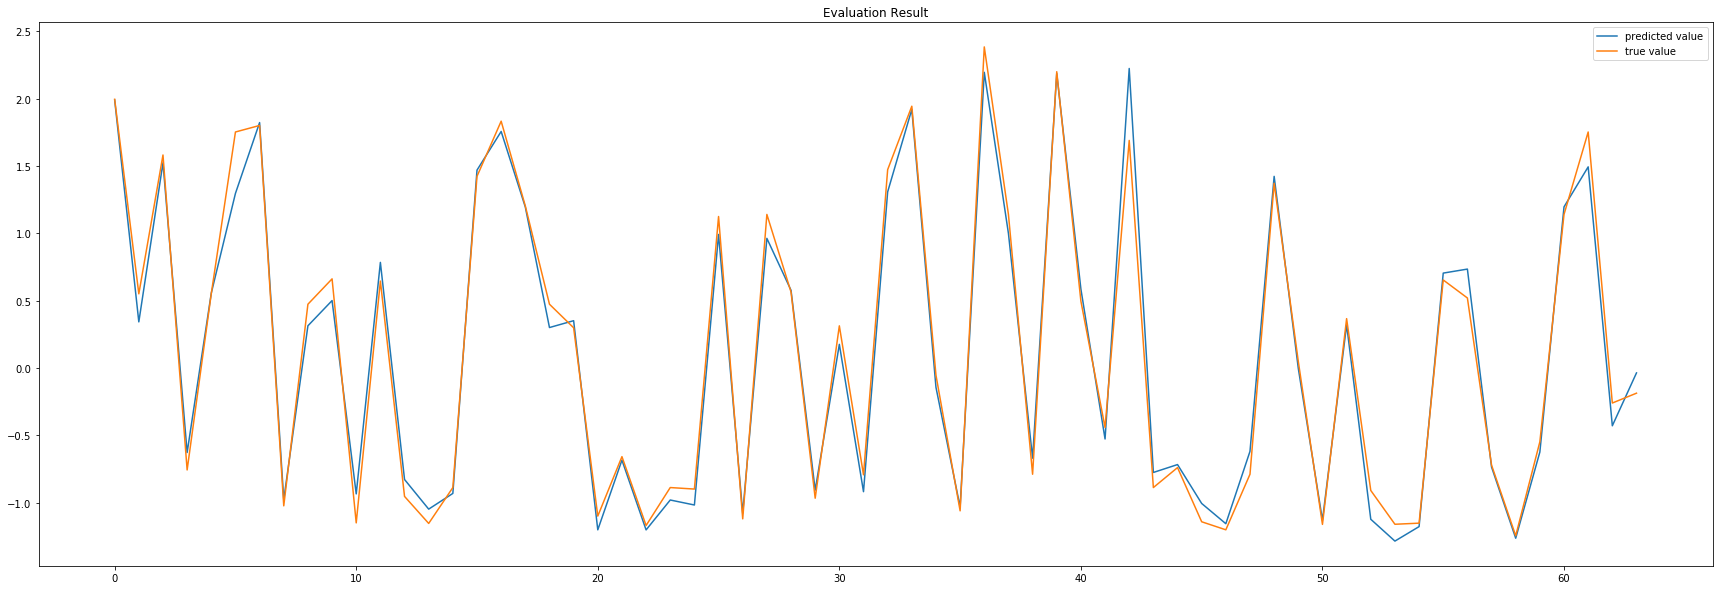

In [166]:
#visiulize the true value with predicted value (using line graph)
x = test_predictions
y = y_test
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.show()

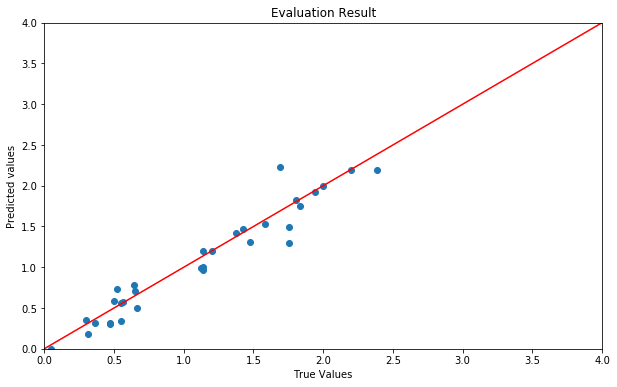

In [167]:
'''=== Visualize the model evaluation skill ==='''


# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,4), ylim=(0, 4)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()